In [84]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [85]:
start = datetime.datetime(2018,10,4)
end =datetime.datetime(2022,10,4)

In [86]:
BTC = web.DataReader('BTC-USD', 'yahoo', start, end)
ETH = web.DataReader('ETH-USD', 'yahoo', start, end)
USDT = web.DataReader('USDT-USD', 'yahoo', start, end) 
BNB = web.DataReader('BNB-USD', 'yahoo', start, end)
print(BTC,ETH,USDT,BNB)

                    High           Low          Open         Close  \
Date                                                                 
2018-10-04   6603.310059   6497.910156   6497.910156   6576.689941   
2018-10-05   6623.620117   6557.410156   6574.149902   6622.479980   
2018-10-06   6628.540039   6577.799805   6622.450195   6588.310059   
2018-10-07   6641.490234   6557.040039   6590.680176   6602.950195   
2018-10-08   6675.060059   6576.040039   6600.189941   6652.229980   
...                  ...           ...           ...           ...   
2022-10-01  19471.154297  19231.082031  19431.105469  19312.095703   
2022-10-02  19370.308594  18970.621094  19311.849609  19044.107422   
2022-10-03  19653.542969  19025.226562  19044.068359  19623.580078   
2022-10-04  20380.343750  19523.839844  19623.583984  20336.843750   
2022-10-05  20343.748047  19801.800781  20335.900391  20160.716797   

                 Volume     Adj Close  
Date                                   
2018-10-0

In [87]:
df = pd.concat([BTC['Adj Close'], ETH['Adj Close'], USDT['Adj Close'], BNB['Adj Close']],axis=1)
df.columns = ['BTC', 'ETH', 'USDT', 'BNB'] 
df

,BTC,ETH,USDT,BNB
Date,,,,
2018-10-04,6576.689941,222.218002,0.996185,10.255600
2018-10-05,6622.479980,227.600998,0.995778,10.636200
2018-10-06,6588.310059,225.119995,0.997177,10.372100
2018-10-07,6602.950195,226.119003,0.996617,10.519000
2018-10-08,6652.229980,229.255005,0.995814,10.506600
...,...,...,...,...
2022-10-01,19312.095703,1311.644409,1.000043,282.871918
2022-10-02,19044.107422,1276.093506,1.000060,284.433105
2022-10-03,19623.580078,1323.439209,1.000089,287.031982


In [88]:
df = np.log(1+df.pct_change())
df

,BTC,ETH,USDT,BNB
Date,,,,
2018-10-04,NaN,NaN,NaN,NaN
2018-10-05,0.006938,0.023935,-0.000409,0.036439
2018-10-06,-0.005173,-0.010961,0.001404,-0.025144
2018-10-07,0.002220,0.004428,-0.000562,0.014064
2018-10-08,0.007436,0.013774,-0.000806,-0.001179
...,...,...,...,...
2022-10-01,-0.006179,-0.012376,-0.000006,-0.004657
2022-10-02,-0.013974,-0.027478,0.000017,0.005504
2022-10-03,0.029974,0.036430,0.000029,0.009096


In [89]:
weights = [0.25, 0.25, 0.25, 0.25]

In [90]:
#calculating my portfolio return
weights[0]*df.BTC.mean() + weights[1]*df.ETH.mean() + weights[2]*df.USDT.mean() + weights[3]*df.BNB.mean()

0.001075010268837764

In [91]:
def expectedportfolioreturn(weights):
    return np.dot(df.mean(),weights)

In [92]:
expectedportfolioreturn(weights)

0.001075010268837764

In [93]:
#portolio variance and covariance
df.cov()

,BTC,ETH,USDT,BNB
BTC,0.001491,0.001618,-0.000003,0.001443
ETH,0.001618,0.002520,-0.000010,0.001965
USDT,-0.000003,-0.000010,0.000015,-0.000012
BNB,0.001443,0.001965,-0.000012,0.002915


In [94]:
pv = (1/4)**2*(df.cov().iloc[0,0]+df.cov().iloc[0,1]+df.cov().iloc[0,2]+df.cov().iloc[0,3]+df.cov().iloc[1,0]+df.cov().iloc[1,1]+df.cov().iloc[1,2]+df.cov().iloc[1,3]+df.cov().iloc[2,0]+df.cov().iloc[2,1]+df.cov().iloc[2,2]+df.cov().iloc[2,3]+df.cov().iloc[3,0]+df.cov().iloc[3,1]+df.cov().iloc[3,2]+df.cov().iloc[3,3])

In [95]:
pv

0.001059023938390247

In [96]:
pv**(1/2)*np.sqrt(250)

0.5145444437534641

In [97]:
def portfoliostd(weights):
    return(np.dot(np.dot(df.cov(),weights),weights))**(1/2)*np.sqrt(250)

In [98]:
portfoliostd(weights)

0.5145444437534641

In [99]:
def weightscreator(df):
    rand = np.random.random(len(df.columns))
    rand /= rand.sum()
    return rand

In [100]:
weightscreator(df)

array([0.16223731, 0.56630629, 0.08955135, 0.18190505])

In [106]:
returns = []
stds = []
w = []

for i in range(50):
    weights = weightscreator(df)
    returns.append(expectedportfolioreturn(weights))
    std.append(portfoliostd(weights))
    w.append(weights)

ValueError: x and y must be the same size

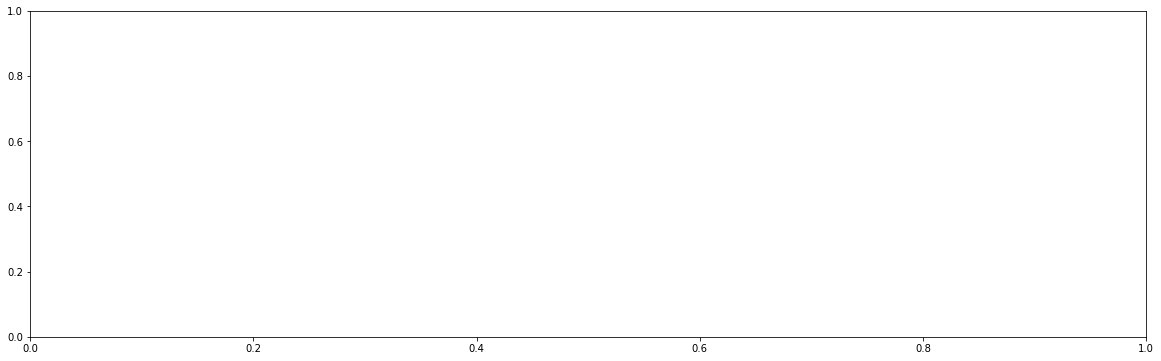

In [107]:
plt.figure(figsize=(20,6))
plt.scatter(stds,returns)
plt.title('Efficient Frontier')
plt.xlabel('Portfolio std')
plt.ylabel('Porfolio returns')
plt.show()